# K-means and Loss function

In [2]:
%matplotlib inline
import cvxopt as opt
from cvxopt import blas, solvers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import inv
import random
from numpy.linalg import inv
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import scale
np.random.seed(4261)
# Turn off progress printing
solvers.options['show_progress'] = False

In [3]:
# prepare data and remove outliers
all_data = pd.read_csv('ETFnew.csv')
# all_data['logsd'] = np.log(all_data['logsd'])
remove_index = list(all_data[all_data['logmean'] < -0.4 ].index)
outlier_remove = all_data.drop(all_data.index[remove_index])
mydata = outlier_remove[['logmean', 'logsd']].values
# mydata = scale(data.values)

In [21]:
def k_means(k):

    # randomely initialize centroids
    i_1 = np.random.choice(mydata[:, 0], k, replace=False).reshape((k, 1))
    i_2 = np.random.choice(mydata[:, 1], k, replace=False).reshape((k, 1))
    mu = np.concatenate((i_1, i_2), axis=1)  # k*2 matrix

    # update each c and m
    c_n = np.zeros(shape=(len(mydata), 1))
    L = np.zeros(shape=(20, 1))
    n_k = np.zeros(shape=(k, 1))

    for t in range(20):
        for c in range(len(mydata)):
            euclidean = np.sum((mydata[c] - mu)**2, axis=1)
            c_n[c] = np.argmin(euclidean)
        for i in range(k):
            n_k[i] = np.sum(c_n == i)
            mu[i] = np.sum(mydata * (c_n == i), axis=0) / n_k[i]
            L[t] += sum(np.sum((c_n == i) * (mydata - mu[i])**2, axis=1))

    return (L, c_n)

In [22]:
k_2 = k_means(2)[0]
k_3 = k_means(3)[0]
k_4 = k_means(4)[0]
k_5 = k_means(5)[0]

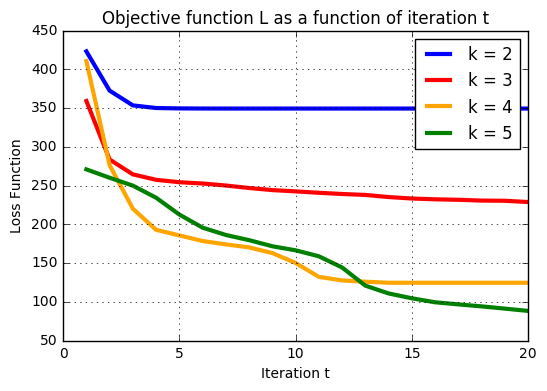

In [23]:
iterations = list(range(1, 21))
plt.plot(iterations, k_2, 'blue', lw=3.0)
plt.plot(iterations, k_3, 'red', lw=3.0)
plt.plot(iterations, k_4, 'orange', lw=3.0)
plt.plot(iterations, k_5, 'green', lw=3.0)
plt.legend(['k = 2', 'k = 3', 'k = 4', 'k = 5'], bbox_to_anchor=(1, 1))
# plt.axis([0, 1550, 0, max(out)+0.1])
plt.xlabel('Iteration t')
plt.ylabel('Loss Function')
plt.title('Objective function L as a function of iteration t')
plt.savefig('loss_fn.png', dpi=200, bbox_inches='tight')
plt.grid(True)
plt.show()

In [131]:
k_3_assign = k_means(3)[1]
k_5_assign = k_means(5)[1]

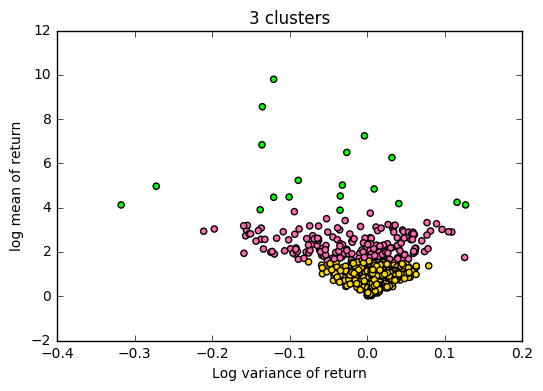

In [132]:
color = k_3_assign
color_map = {0: 'gold',
             1: 'lime',
             2: 'hotpink',
             }

color_lable = [color_map[int(l)] for l in color]
plt.xlabel('Log variance of return')
plt.ylabel('log mean of return')
plt.title('3 clusters')
plt.scatter(mydata[:, 0], mydata[:, 1], c=color_lable)
plt.savefig('k3.png', dpi=200, bbox_inches='tight')
plt.show()

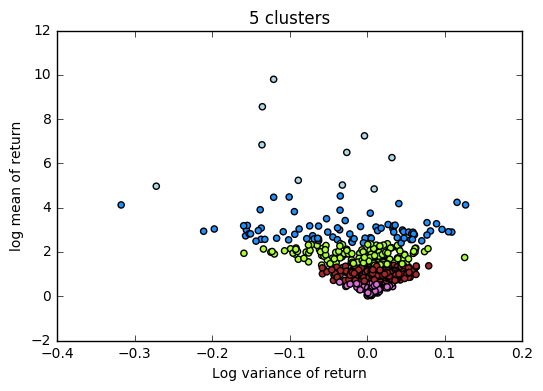

In [133]:
color = k_5_assign
color_map = {0: 'brown',
             1: 'greenyellow',
             2: 'orchid',
             3: 'dodgerblue',
             4: 'lightblue',
             }

color_lable = [color_map[int(l)] for l in color]
plt.xlabel('Log variance of return')
plt.ylabel('log mean of return')
plt.title('5 clusters')
plt.scatter(mydata[:, 0], mydata[:, 1], c=color_lable)
plt.savefig('k5.png', dpi=200, bbox_inches='tight')
plt.show()

# END